In [ ]:
import re
import numpy as np
import scipy.io as sio
# ==================== Config ====================
output_name = "../mat/d6.mat"
file_train = "/home/ubuntu/elec823/last_output/d6_J_Pearson_ALL_train_0.txt"
file_val = "/home/ubuntu/elec823/last_output/d6_J_Pearson_ALL_train_0.txt"

# Read txt file
noise_types = {"cs":0, "ssn":1}
snrs = {"snrHi":0, "snrMid":1, "snrLo":2}
scores = np.zeros((20, 2, 3, 180))

def load_pre (txt_file, scores):
    with open(txt_file) as f:
        lines = f.readlines()[1:]  # 跳过第一行，从第二行开始读取
    for line in lines:
        elements = line.strip().split(',')  # 使用逗号分隔每行的元素
        audio_path = elements[0]
        split_str = audio_path.split('/')
        output = [split_str[-4], split_str[-3], split_str[-2], split_str[-1].split('_')[-2].split('.')[0]]
        mod = int(''.join(re.findall(r'\d+', output[0])))
        noise_type = noise_types[output[1]]
        snr = snrs[output[2]]
        utt = int(output[3])
        scores[mod-1, noise_type, snr, utt-1] = elements[2]
    return scores

out = load_pre(file_val, load_pre(file_train, scores))
sio.savemat(output_name, {"preds":out})

In [ ]:
import re
import numpy as np
import scipy.io as sio
# ==================== Config ====================
file_train = "/home/ubuntu/elec823/last_output/e5_J_CCC_train_1.txt"
file_val = "/home/ubuntu/elec823/last_output/e5_J_CCC_val_1.txt"

def load_pre (txt_file):
    scores = []
    preds = []
    with open(txt_file) as f:
        lines = f.readlines()[1:]  # 跳过第一行，从第二行开始读取
    for line in lines:
        elements = line.strip().split(',')  # 使用逗号分隔每行的元素
        scores.append(float(elements[0])) 
        preds.append(float(elements[1]))
        print(float(elements[0]), float(elements[1]))
        # break
    return scores, preds

# out = load_pre(file_val, load_pre(file_train, scores))
# sio.savemat(output_name, {"preds":out})
scores, preds = load_pre (file_val)

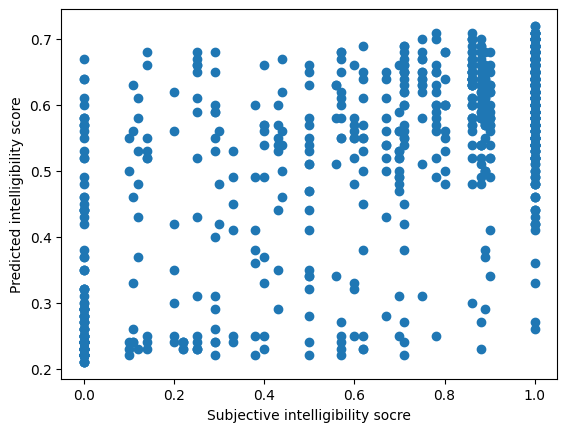

In [21]:
import matplotlib.pyplot as plt
# 创建散点图
plt.scatter(scores, preds)

plt.xlabel('Subjective intelligibility socre')
plt.ylabel('Predicted intelligibility score')
plt.savefig('./scatter_plot.png', dpi=300, bbox_inches='tight')